<a href="https://colab.research.google.com/github/Blazer-007/Data-Science/blob/master/Linear_Regression_(Multiple_Features)Boston_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_boston

In [0]:
boston = load_boston()

X = boston.data
y = boston.target

In [3]:
print(X.shape,y.shape)

(506, 13) (506,)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [0]:
# print(boston.DESCR)

In [8]:
import pandas as pd
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
# Normalise the dataset
# each feature should have 0 mean and 1 std
# axis - 0 col wise axis - 1 row wise
import numpy as np
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
print(u.shape,std.shape)

(13,) (13,)


In [0]:
# Normalising
X = (X-u)/std

In [14]:
pd.DataFrame(X[:5,:]).head

<bound method NDFrame.head of          0         1         2   ...        10        11        12
0 -0.419782  0.284830 -1.287909  ... -1.459000  0.441052 -1.075562
1 -0.417339 -0.487722 -0.593381  ... -0.303094  0.441052 -0.492439
2 -0.417342 -0.487722 -0.593381  ... -0.303094  0.396427 -1.208727
3 -0.416750 -0.487722 -1.306878  ...  0.113032  0.416163 -1.361517
4 -0.412482 -0.487722 -1.306878  ...  0.113032  0.441052 -1.026501

[5 rows x 13 columns]>

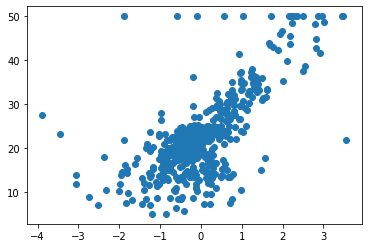

In [15]:
# Plot Y and any feature
import matplotlib.pyplot as plt
plt.scatter(X[:,5],y)
plt.show()

In [16]:
X.shape,y.shape

((506, 13), (506,))

In [17]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(506, 14)


In [18]:
X[:4,:4]

array([[ 1.        , -0.41978194,  0.28482986, -1.2879095 ],
       [ 1.        , -0.41733926, -0.48772236, -0.59338101],
       [ 1.        , -0.41734159, -0.48772236, -0.59338101],
       [ 1.        , -0.41675042, -0.48772236, -1.30687771]])

In [0]:
# X - Matrix (m * n)
# x - Vector (single example with n features)

def hypothesis(x,theta):
  y_ = 0.0
  n = x.shape[0]
  for i in range(n):
    y_ += (theta[i]*x[i])
  return y_

In [0]:
def error(X,y,theta):
  e = 0.0
  m = X.shape[0]
  for i in range(m):
    y_ = hypothesis(X[i],theta)
    e += (y[i]- y_)**2

  return e/m

In [0]:
def gradient(X,y,theta):
  m,n = X.shape
  grad = np.zeros((n,))

  # for all values of j
  for j in range(n):
    # sum over all examples
    for i in range(m):
      y_ = hypothesis(X[i],theta)
      grad[j] += (y_ - y[i])*X[i][j]

  return grad/m

In [0]:
def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
  m,n = X.shape
  theta = np.zeros((n,))
  error_list = []

  for i in range(max_epochs):
    e = error(X,y,theta)
    error_list.append(e)

    grad = gradient(X,y,theta)
    for j in range(n):
      theta[j] = theta[j] - learning_rate * grad[j]

  return theta,error_list

In [32]:
import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time Taken is ",end - start)

Time Taken is  19.324641466140747


In [33]:
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


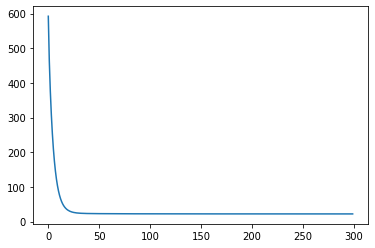

In [34]:
plt.plot(error_list)

In [0]:
y_ = []
m = X.shape[0]
for i in range(m):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

In [0]:

def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [38]:
# SCORE
r2_score(y,y_)

74.04541323942743

Vectorize Implementation

In [0]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [0]:
def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m

In [0]:
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

In [0]:
def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list


In [43]:
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken by Vectorized Code",end-start)

Time taken by Vectorized Code 0.018378496170043945


In [44]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

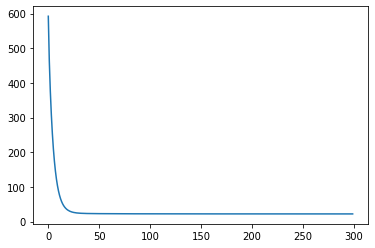

In [45]:
plt.plot(error_list)
plt.show()

In [46]:
## Predictions
y_ = hypothesis(X,theta)
r2_score(y,y_)

74.04541323942743